# Principal Component Analysis:
## Topic: Optical Networks
### Student: Kaleb Alfaro Badilla
### Dataset: https://archive.ics.uci.edu/ml/datasets/Optical+Interconnection+Network+

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00449/optical_interconnection_network.csv"

df = pd.read_csv(url,sep=';')
features = df.columns[:10]
df = df.loc[:,features] 
#print(df.loc[:10,features].values)

# Code strings to numbers
# Map ',' to '.' as follows 0,12313 --> 0.12313 
for f in features:
    if f in features[:2]: # n,m are integers
        df.loc[:,f]=[float(x) for x in df.loc[:,f].values]
    elif f in features[4:]:
        df.loc[:,f]=[float(x.replace(',','.')) for x in df.loc[:,f].values]

# Set de entrenamiento
x=df[features].values

# Label encoder para los atributos de etiquetas
dist_le = LabelEncoder()

x[:,2] = dist_le.fit_transform(x[:,2])
x[:,3] = dist_le.fit_transform(x[:,3])

# One Hot Encoder para codificar estos atributos

ohe = OneHotEncoder(categorical_features=[2,3])
ohe.fit_transform(x)
x=ohe.transform(x).toarray()

Preprocesamiento para PCA

Estandarización de los datos

In [5]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

# Finally is proceeded to compute PCA
n_components = 14
pca_features = ['pc'+str(i) for i in range(n_components)]

Cálculo de PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

Comparación relativa de los componentes principales

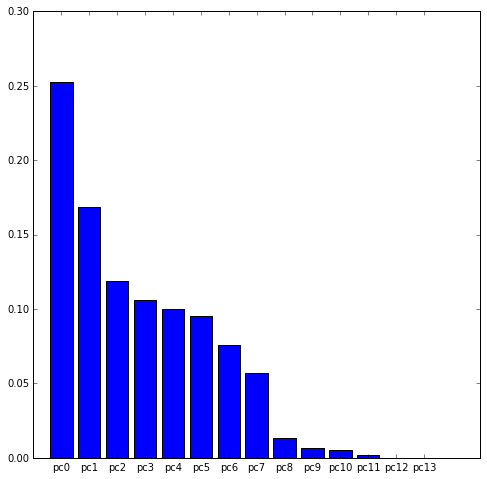

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ind = range(1,n_components+1)
ax.bar(ind,pca.explained_variance_ratio_,align='center')
ax.set_xticks(ind)
ax.set_xticklabels(pca_features)
plt.show()

Graficación clustering utilizando solamente las 2 componentes principales más importantes.

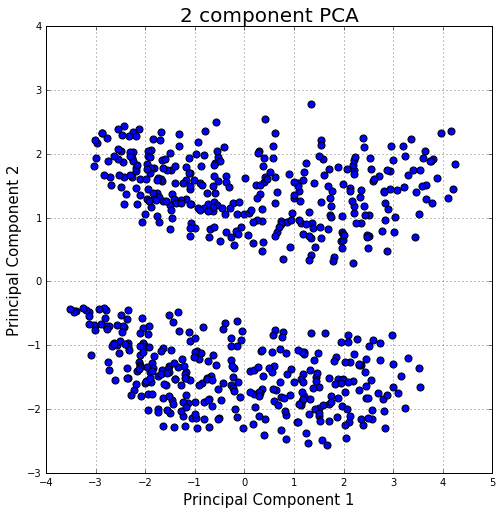

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , s = 50)
ax.grid()